In [1]:
%reload_ext autoreload
%autoreload 2

# import logging
# logging.basicConfig(level=logging.INFO)

In [2]:
from aiknows.config import logger, config

In [7]:
config.log_level = 'info'

In [3]:
logger

<Logger aiknows.config (ERROR)>

In [20]:
import ast

def exec_and_return_last_expr(code):
    # Parse the code into an AST
    tree = ast.parse(code)

    # Get the last body element
    last = tree.body[-1]

    # Check if the last body element ends with semicolon
    last_line = code.split('\n')[-1]
    return_last_expr = not last_line.rstrip().endswith(";")

    # Remove the last body element from the original tree
    tree.body = tree.body[:-1]

    namespace = {}
    exec(compile(tree, filename="<ast>", mode="exec"), namespace)

    if return_last_expr and isinstance(last, ast.Expr):
        # If the last body element does not end with semicolon, return its value
        return eval(compile(ast.Expression(last.value), filename="<ast>", mode="eval"), namespace)
    else:
        # If the last body element ends with semicolon or is not an expression, do not return its value
        exec(compile(ast.Module(body=[last], type_ignores=[]), filename="<ast>", mode="exec"), namespace)
        return None

exec_and_return_last_expr('a = 1; a')

1

In [4]:
from aiknows import runtime
local_runtime = runtime.LocalRuntime()

local_runtime.run('print("hello world")')

TypeError: expected some sort of expr, but got <_ast.Expr object at 0x7fd720b38100>

In [2]:
from aiknows import ai, gpt

In [3]:
gpt('kek vs mem? a?')

'Sorry, I do not understand the context of this question. Can you please provide more information or rephrase the question?'

In [19]:
from sklearn.datasets import load_iris
df = load_iris()
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
type(df)

sklearn.utils._bunch.Bunch

In [22]:
from aiknows.explain import explain

explain(df)

'object of type sklearn.utils._bunch.Bunch'

In [25]:
df['data'] + 1

array([[6.1, 4.5, 2.4, 1.2],
       [5.9, 4. , 2.4, 1.2],
       [5.7, 4.2, 2.3, 1.2],
       [5.6, 4.1, 2.5, 1.2],
       [6. , 4.6, 2.4, 1.2],
       [6.4, 4.9, 2.7, 1.4],
       [5.6, 4.4, 2.4, 1.3],
       [6. , 4.4, 2.5, 1.2],
       [5.4, 3.9, 2.4, 1.2],
       [5.9, 4.1, 2.5, 1.1],
       [6.4, 4.7, 2.5, 1.2],
       [5.8, 4.4, 2.6, 1.2],
       [5.8, 4. , 2.4, 1.1],
       [5.3, 4. , 2.1, 1.1],
       [6.8, 5. , 2.2, 1.2],
       [6.7, 5.4, 2.5, 1.4],
       [6.4, 4.9, 2.3, 1.4],
       [6.1, 4.5, 2.4, 1.3],
       [6.7, 4.8, 2.7, 1.3],
       [6.1, 4.8, 2.5, 1.3],
       [6.4, 4.4, 2.7, 1.2],
       [6.1, 4.7, 2.5, 1.4],
       [5.6, 4.6, 2. , 1.2],
       [6.1, 4.3, 2.7, 1.5],
       [5.8, 4.4, 2.9, 1.2],
       [6. , 4. , 2.6, 1.2],
       [6. , 4.4, 2.6, 1.4],
       [6.2, 4.5, 2.5, 1.2],
       [6.2, 4.4, 2.4, 1.2],
       [5.7, 4.2, 2.6, 1.2],
       [5.8, 4.1, 2.6, 1.2],
       [6.4, 4.4, 2.5, 1.4],
       [6.2, 5.1, 2.5, 1.1],
       [6.5, 5.2, 2.4, 1.2],
       [5.9, 4

In [27]:
type(df['data'])

numpy.ndarray

In [29]:
df['data'].reshape(25, -1)

array([[5.1, 3.5, 1.4, 0.2, 4.9, 3. , 1.4, 0.2, 4.7, 3.2, 1.3, 0.2, 4.6,
        3.1, 1.5, 0.2, 5. , 3.6, 1.4, 0.2, 5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3, 5. , 3.4, 1.5, 0.2, 4.4, 2.9, 1.4, 0.2, 4.9,
        3.1, 1.5, 0.1, 5.4, 3.7, 1.5, 0.2, 4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1, 4.3, 3. , 1.1, 0.1, 5.8, 4. , 1.2, 0.2, 5.7,
        4.4, 1.5, 0.4, 5.4, 3.9, 1.3, 0.4, 5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3, 5.1, 3.8, 1.5, 0.3, 5.4, 3.4, 1.7, 0.2, 5.1,
        3.7, 1.5, 0.4, 4.6, 3.6, 1. , 0.2, 5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2, 5. , 3. , 1.6, 0.2, 5. , 3.4, 1.6, 0.4, 5.2,
        3.5, 1.5, 0.2, 5.2, 3.4, 1.4, 0.2, 4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2, 5.4, 3.4, 1.5, 0.4, 5.2, 4.1, 1.5, 0.1, 5.5,
        4.2, 1.4, 0.2, 4.9, 3.1, 1.5, 0.2, 5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2, 4.9, 3.6, 1.4, 0.1, 4.4, 3. , 1.3, 0.2, 5.1,
        3.4, 1.5, 0.2, 5. , 3.5, 1.3, 0.3, 4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2, 5. , 3.5, 1.6

INFO:aiknows.ai:cache miss, generating bytecode
INFO:aiknows.ai:len prompt messages: 34
INFO:aiknows.ai:estimate prompt token length: 1473
INFO:aiknows.ai:real prompt token length: 1750
INFO:aiknows.ai:assistant: ```python
# packages might be missing, but we don't attempt to install them
import numpy as np
import matplotlib.pyplot as plt

# calculate some statistics
mean = np.mean(data)
std = np.std(data)

# create a histogram of the data
fig, ax = plt.subplots()
ax.hist(data.flatten(), bins=50)

# add known labels and title to the plot
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Data')

# user don't intend to observe outside effect
plt.close(fig)

final_result = fig
```


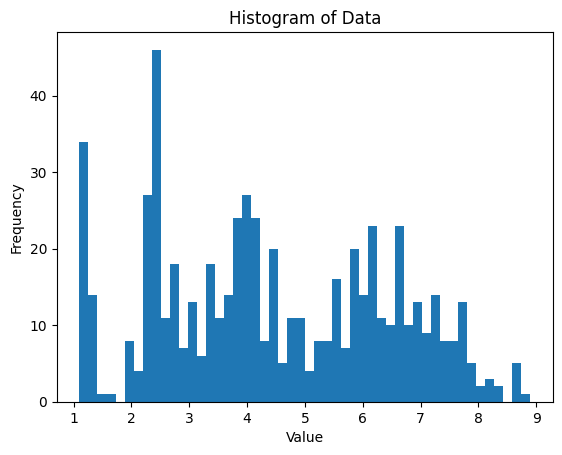

In [30]:
ai('explore data and visialize it', data=df['data'].reshape(25, -1) + 1.0)

`ai`, `aai`
`gpt`, `agpt`

In [13]:
url = 'https://cat-fact.herokuapp.com/facts'
ai('make a GET request to url and summarize the response', url=url)

INFO:aiknows.ai:cache miss, generating bytecode
INFO:aiknows.ai:len prompt messages: 34
INFO:aiknows.ai:estimate prompt token length: 1462
INFO:aiknows.ai:real prompt token length: 1675
INFO:aiknows.ai:assistant: ```python
import requests

# make a GET request to the specified URL
response = requests.get(url)

# summarize the response using chat-gpt
summary = gpt(f"Summarize the following text: \n{response.text}")

final_result = summary
```


"The text includes various pieces of information about cats, including the number of sounds they make (about 100), the amount of time they spend sleeping (70%), and the popularity of cats as pets in the United States (more than dogs). One fact also mentions the technical term for a cat's hairball (bezoar). One contributor says they don't know anything about cats."

In [9]:
import requests
from bs4 import BeautifulSoup

# we use duckduckgo's html api to get search results
url = 'https://duckduckgo.com/html/'
params = {
    'q': 'trump news',
    'kl': 'us-en',
    't': 'h_',
    'va': 'm',
    'df': 'd',
    's': '0',
    'nextParams': '',
    'v': 'l',
    'o': 'json',
    'api': '/d.js',
}
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'Referer': 'https://duckduckgo.com/html/',
}
response = requests.get(url, params=params, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

news_headlines = [headline.text for headline in soup.select('.result__title')]
top_3_news = news_headlines[:3]

news_headlines

['\n']

In [8]:
response.content
soup = BeautifulSoup(response.content, 'html.parser')

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n\n<!--[if IE 6]><html class="ie6" xmlns="http://www.w3.org/1999/xhtml"><![endif]-->\n<!--[if IE 7]><html class="lt-ie8 lt-ie9" xmlns="http://www.w3.org/1999/xhtml"><![endif]-->\n<!--[if IE 8]><html class="lt-ie9" xmlns="http://www.w3.org/1999/xhtml"><![endif]-->\n<!--[if gt IE 8]><!--><html xmlns="http://www.w3.org/1999/xhtml"><!--<![endif]-->\n<head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n  <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=3.0, user-scalable=1" />\n  <meta name="referrer" content="origin" />\n  <meta name="HandheldFriendly" content="true" />\n  <meta name="robots" content="noindex, nofollow" />\n  <title>trump news at DuckDuckGo</title>\n  <link title="DuckDuckGo (HTML)" type="application/opensearchdescription+xml" rel="search" href="//duckduckgo.com/opensearch_html_v2.xml" />\

In [5]:
_

['\n']